**Комментарий ревьюера**

Дарья , привет! Меня зовут Сергей Волков, я буду проверять твой проект. Если не против, давай общаться на «ты». Если это неудобно, дай знать, перейдем на «вы».

У тебя уже проделана большая работа над проектом, но давай сделаем его еще лучше. Дальше ты найдешь мои комментарии — пожалуйста, не перемещай и не удаляй их. Буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌красный текст - так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️оранжевый текст - есть рекомендации, на что стоит обратить внимание. Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️зеленый текст - все отлично.</div>

Давай работать над проектом в диалоге: если что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Привет Сергей! спасибо за проверку моего проекта. Что-то исправила, что-то доделаю после еще одной проверки. Жду ответы на мои комменты:)
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️Снова привет!).</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Отлично. Хорошо, когда всместе с названием есть цель проекта. </div>

## Подготовка

Загрузим данные.

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

try:
    data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'], index_col=[0])
except:
    data = pd.read_csv('./taxi.csv', parse_dates=['datetime'], index_col=[0])

#data['datetime'] = pd.to_datetime(data['datetime'])

print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


Проверим хронологичность данных.

In [24]:
data.sort_index()
print(data.index.is_monotonic)
print(data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Хронология важна во временных рядах. </div>

Видно что данные чистые и отсортированы, проведем ресемплирование.

<AxesSubplot:xlabel='datetime'>

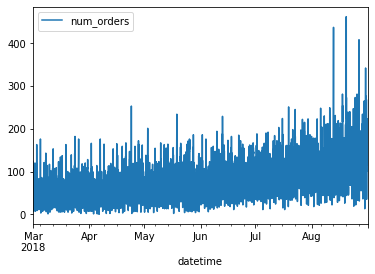

In [25]:
data = data.resample('1H')
data = data.sum()
data.plot()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Расемплирование проще всего интерпритируется с функцией суммы. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента_ver2:</b> Переделала в функцию суммы.
</div>

## Анализ

По графику уже можно сказать, что данные довольно стационарны.
Проверим наличие тренда.

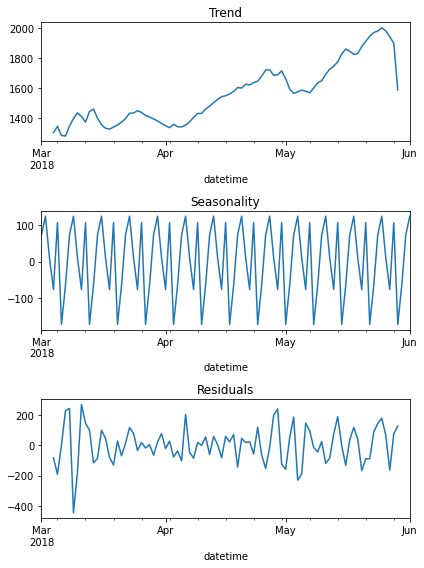

In [26]:
data_decomposed = data['2018-03-01 00:00:00':'2018-06-01 00:00:00'].resample('1D').sum()
decomposed = seasonal_decompose(data_decomposed)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

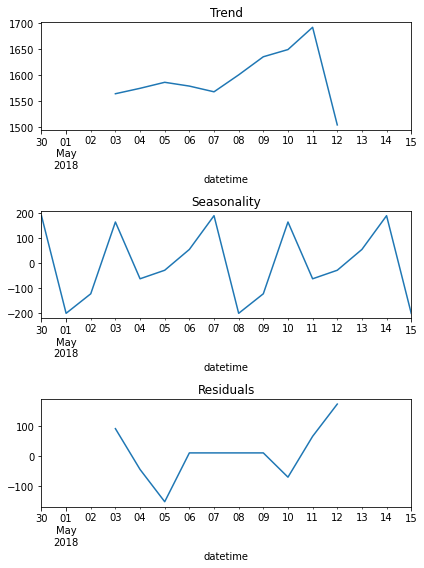

In [27]:
# к.р.
data_decomposed = data['2018-04-30 00:00:00':'2018-05-15 00:00:00'].resample('1D').sum()
decomposed = seasonal_decompose(data_decomposed)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️ Давай еще раз этот момент. Когда взяли веспериод увидели трендвосходящий, выше я взял две недели, что видим, на графике тренда  видим, что у нас в понедельник и четверг и выходные всегда максимальное кол-во заказов, а вторник минмальное, чтоб это проверить берем две недели другого месяца. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента_ver3:</b> Что-то я запуталась, я думала что тренд это однонаправленное явление (либо вверх либо вниз), а тут тренд больше на сезонность похож. И как бы там ни было, получается что общий тренд увеличения значения по месяцам учитывать не надо, то есть признаками берем только:
- hour так как есть сезонная зависимость
- dayofweek так как есть зависимость по тренду
и больше ничего?
    
Оставила только их ниже в признаках.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️Тренд похож больше на сезонность потомучто рассемплирование по часу, если возьмем по дню, то другая картина будет, но суть не изменится.</div>

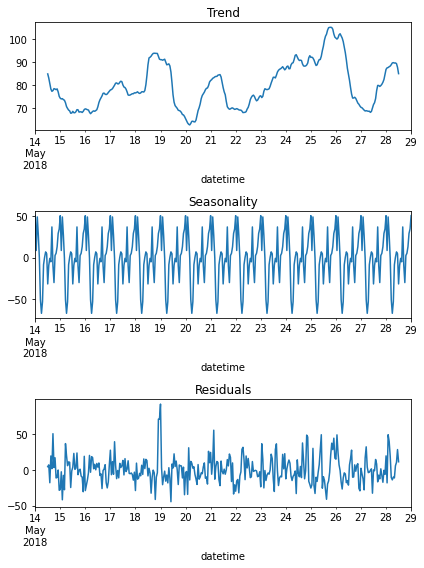

In [29]:
# к.р.
data_decomposed = data['2018-05-14 00:00:00':'2018-05-29 00:00:00']
decomposed = seasonal_decompose(data_decomposed)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️ Видим похожую картину, значит можно сдлать вывод, что есть недельная сезонность, зависимостьот дня недели, таким же образом проверяют месячную и часовую сезонность. Видим что на 0.00 и 18.00 пики максимума, а 6.00 мин кол-во заказов. </div>

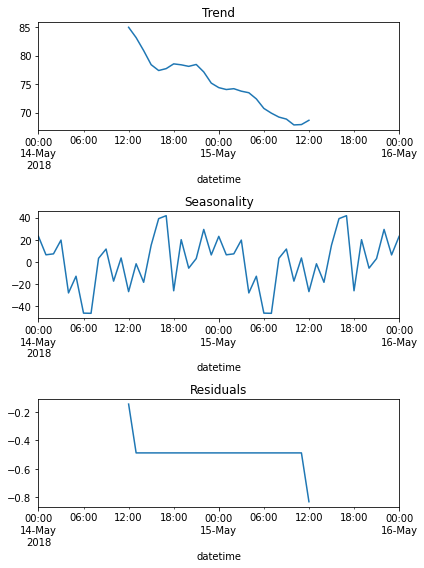

In [30]:
# к.р.
data_decomposed = data['2018-05-14 00:00:00':'2018-05-16 00:00:00']
decomposed = seasonal_decompose(data_decomposed)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Видно, что есть возрастающий тренд по месяцам и сезонность по дням (ежедневные повторяющиеся пики о падения).
Из анализа видно, что предсказания необходимо делать учитывая часы, дни месяца и недели и месяцы.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌Анализ во временном ряду подразумевает под сабой нахождение зависимостей связанных с временными интервалами, т.е. часовые сезонности или недельные или месячные, это мы можен определить с помощью функции декомпозиции, раскладывая рядна разных временных интервалах, если не понятен этот момент дай знать пожалуйста. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента_ver2:</b> Все теперь поняла, сначала сделала график Seasonality с неправильным временным масштабом, там все слилось и непонятно было есть ли она вообще. Переделала, вроде сейчас все понятно.
</div>

## Обучение

In [31]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['month'] = data.index.month
    #data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 24*7, 25)

data.head()

,num_orders,hour,month,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,3,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,3,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,3,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,3,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌Наши признаки сгенерированы на угад, например добавив год, получили константу, т.к. данные за 8 месяцев, определить призанки может помочь только анализ.  </div>

In [32]:
train, valid = train_test_split(data, shuffle=False, test_size=0.25)
train = train.dropna()

train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
features_valid = valid.drop('num_orders', axis=1)
features_test = test.drop('num_orders', axis=1)

target_train = train['num_orders']
target_valid = valid['num_orders']
target_test = test['num_orders']


In [33]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(3806, 172)
(1104, 172)
(442, 172)


### Линейная регрессия

In [34]:
model_1 = LinearRegression().fit(features_train, target_train)

predictions_linearR = model_1.predict(features_valid)
result_linearR = round(mean_squared_error(target_valid, predictions_linearR)**0.5,2)


print("RMSE валидационной выборки по линейной регрессии: ", result_linearR)

RMSE валидационной выборки по линейной регрессии:  30.58


### Случайный лес

In [35]:
best_model_randomF = None
best_result_randomF = 10000
best_est_randomF = 0
best_depth_randomF = 0
for est in range(10, 101, 10):
    for depth in range (1, 10):
        model_2 = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_2.fit(features_train,target_train) 
        predictions = model_2.predict(features_valid) 
        result = mean_squared_error(target_valid, predictions)**0.5
        if result < best_result_randomF:
            best_model_randomF = model_2
            best_result_randomF = result
            best_est_randomF = est
            best_depth_randomF = depth
result_randomF = round(best_result_randomF,2)
print("RMSE наилучшей модели на валидационной выборке:", result_randomF, "Количество деревьев:", best_est_randomF, "Максимальная глубина:", best_depth_randomF)

RMSE наилучшей модели на валидационной выборке: 27.88 Количество деревьев: 80 Максимальная глубина: 9


### Дерево решений

In [36]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
for depth in range(1, 20):
    model_3 = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model_3.fit(features_train,target_train) 
    predictions_valid_tree = model_3.predict(features_valid)
    result = mean_squared_error(target_valid, predictions)**0.5
    if result > best_result_tree:
        best_model_tree = model_3
        best_result_tree = result
        best_depth_tree = depth
        
result_tree = round(best_result_tree,2)
print("RMSE наилучшей модели на валидационной выборке:", result_tree, "Максимальная глубина:", best_depth_tree)

RMSE наилучшей модели на валидационной выборке: 28.02 Максимальная глубина: 1


На валидационной выборке все модели показали хорошие результаты. Проверим наиболее удачную на тестовой выборке.

## Тестирование

In [37]:
model_2 = RandomForestRegressor(random_state=12345, n_estimators=80, max_depth=9)
model_2.fit(features_train,target_train) 
predictions = model_2.predict(features_test) 
result = mean_squared_error(target_test, predictions)**0.5

print("RMSE наилучшей модели на тестовой выборке:", result)

RMSE наилучшей модели на тестовой выборке: 39.884682625493504


Модель работает. Можно показывать заказчику :D

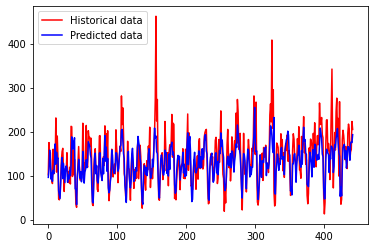

In [38]:
a=np.array(target_test, np.int32)
b=np.array(predictions, np.int32)

plt.plot(a, color = 'red', label = 'Historical data')
plt.plot(b, color = 'blue', label='Predicted data')
plt.legend()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>  Если линейной регресии сделать перебор лагов и скользящей средней, то она может показать себя лучше чем лес, на временных рядах линейные модели часто себяпоказывают лучше, чем деревья. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента_ver2:</b> Можешь пожалуйста пояснить этот пункт? скользящее среднее надо делать перед делением на выборки, чтобы они для всех моделей были одинаковы?
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️ У нас параметров для Линенйой регрессии кроме лага и скользящей средней нет, поэтому для нее мы можем перебором подобрать оптимальный. Пример ниже, если захочешь реализовать, лучше её последнейпроверять или сделать отдельный датафрейм, чтоб её параметры в другие модели не попали.
</div>

<div class="alert alert-success">
    
<b>Комментарий ревьюера v.2:</b> Забыл прошлый раз добавить, анализ временных тяжело представить без графиков, нам нужен график работы модели, особенно это актуально, когда естьдве модели с близкими метриками, примерграфика выше. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сразу задам вопрос, получается что гиперпараметры в make_features нужно просто подбирать перебором? нет какого то более автоматизированного метода?
</div>

<div class="alert alert-success">
    
<b>Комментарий ревьюера:</b>  Параметры подбираем анализом, вот видео, в яндекс барузере можно смотреть с переводом https://www.youtube.com/watch?v=W-YCKMNTcqE, а так есть еще библиотека для автоматической генерации фичей Tfresh https://otus.ru/nest/post/1024/. </div>

<div class="alert alert-success">
    
<b>Bnjujdsq комментарий ревьюера:</b> ✔️Дарья  ,  проделана большая работа, спасибо тебе.
    
   - Проект хорошо структуирован.
   - Необходимо вернуться к анализу, анализ не полный на основании его тяжело добавить правильно признаки.
   - Необходимо разобраться с признаками, есть лишнии и недостающий.
   - Оставлю доп. материал по теме временных рядов https://habr.com/ru/company/ods/blog/327242/.
    
  Жду твоих исправлений и рад буду ответить на вопросы.)

<div class="alert alert-success">
    
<b> Итоговый комментарий ревьюера v.2: Дарья, дооформи проект по рекомендациям, котрые я оставил, если остались вопросы рад буду ответить, в чапстности по блоку анализа и формирования признаков.)</b> 

<div class="alert alert-success">
    
<b> Итоговый комментарий ревьюера v.3: Дарья, проект принят, еслиостались вопросы, можешь задать через куратора.</b> 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48